## Predicting Price with Neighborhood


In [3]:
import warnings
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


# IMPORT


In [4]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    # Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]

    # Split "lat-lon" column
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns="lat-lon", inplace=True)

    df["neighborhood"] = df["place_with_parent_names"].str.split("|").str[3]
    df.drop(columns="place_with_parent_names", inplace=True)

    return df
    

# uze of glob - pattern to include 

In [5]:
files = glob("data/buenos-aires-real-estate-*.csv") 
files

frames = []
for file in files:
    df= wrangle(file)
    frames.append(df)


# concate the frames

In [6]:
df = pd.concat(frames, ignore_index=True)   
df.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,neighborhood
0,sell,apartment,120000.0,USD,1819488.00,120000.0,NaN,55.0,NaN,2181.818182,NaN,2.0,NaN,http://villa-general-mitre.properati.com.ar/xx...,-34.616004,-58.470506,Villa General Mitre
1,sell,apartment,89000.0,USD,1349453.60,89000.0,NaN,37.0,NaN,2405.405405,7.0,2.0,NaN,http://palermo.properati.com.ar/ya5i_venta_dep...,-34.584712,-58.444927,Palermo
2,sell,apartment,183495.0,USD,2782224.58,183495.0,92.0,57.0,1994.51087,3219.210526,NaN,2.0,NaN,http://saavedra.properati.com.ar/12izq_venta_d...,-34.554652,-58.493644,Saavedra
3,sell,apartment,95000.0,USD,1440428.00,95000.0,53.0,47.0,1792.45283,2021.276596,NaN,2.0,NaN,http://villa-del-parque.properati.com.ar/wy0n_...,-34.610581,-58.479625,Villa del Parque
4,sell,apartment,95000.0,USD,1440428.00,95000.0,0.0,35.0,NaN,2714.285714,NaN,1.0,NaN,http://belgrano.properati.com.ar/xw9a_venta_de...,-34.558227,-58.458357,Belgrano


# Explore the df

In [7]:
df.shape

(6582, 17)

# Create your feature matrix X_train and target vector y_train. X_train should contain one feature: "neighborhood". Your target is "price_aprox_usd".



In [8]:
target = "price_aprox_usd"
features = ["neighborhood"]
y_train = df[target]
X_train = df[features]

## Build Model - baseline

In [9]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(df)
print("Mean apt price " ,y_mean)
print("Baseline price " ,mean_absolute_error(y_train, y_pred_baseline))

Mean apt price  132383.83701458524
Baseline price  44860.10834274133


## ITerate First, instantiate a OneHotEncoder named ohe. Make sure to set the use_cat_names argument to True. Next, fit your transformer to the feature matrix X_train. Finally, use your encoder to transform the feature matrix X_train, and assign the transformed data to the variable XT_train.

use Linerar regression , get error as nebighnourhood is string but we need float as math exp need numeric 

In [10]:
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)
XT_train = ohe.transform(X_train)
XT_train.head()

,neighborhood_Villa General Mitre,neighborhood_Palermo,neighborhood_Saavedra,neighborhood_Villa del Parque,neighborhood_Belgrano,neighborhood_Coghlan,neighborhood_Chacarita,neighborhood_Boedo,neighborhood_Caballito,neighborhood_Monserrat,...,neighborhood_Versalles,neighborhood_Villa Lugano,neighborhood_Parque Avellaneda,neighborhood_Las Cañitas,neighborhood_Villa Soldati,neighborhood_Parque Chas,neighborhood_Velez Sarsfield,neighborhood_Pompeya,neighborhood_Villa Real,neighborhood_Catalinas
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
      Ridge()
      )
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print("Mean apt price " ,y_mean)
print("Baseline price " ,mean_absolute_error(y_train, y_pred_baseline))


Mean apt price  132383.83701458524
Baseline price  44860.10834274133


In [12]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Mean apt price " ,y_mean)
print("Baseline price " ,mean_absolute_error(y_train, y_pred_baseline))
print("Training MAE " ,mae_training)


Mean apt price  132383.83701458524
Baseline price  44860.10834274133
Training MAE  39350.21591281253


In [13]:
X_test = pd.read_csv("data/buenos-aires-test-features.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    246624.694624
1    161355.968734
2     98232.051308
3    110846.030377
4    127777.538197
dtype: float64

In [14]:
intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

## Task 2.3.11: Create a pandas Series named y_pred_test that contains the predicted values for the test data.

coefficients len: 57
[  7714.62159938  45934.4105851   14701.16243686 -12595.50084744
  46954.20800905]


In [15]:
feature_names = model.named_steps["onehotencoder"].get_feature_names_out()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

## Task 2.3.12: Create a pandas Series named y_pred_test that contains the predicted values for the test data.

features len: 57
['neighborhood_Villa General Mitre' 'neighborhood_Palermo'
 'neighborhood_Saavedra' 'neighborhood_Villa del Parque'
 'neighborhood_Belgrano']


In [16]:
feat_imp = pd.Series(model.named_steps["ridge"].coef_, index=feature_names).sort_values()
feat_imp.head()


neighborhood_Villa Soldati   -59248.813857
neighborhood_Villa Lugano    -48669.354978
neighborhood_Pompeya         -43909.591101
neighborhood_Constitución    -41748.733031
neighborhood_Parque Chas     -32439.870833
dtype: float64

In [17]:
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 118524.65
+ (-59248.81 * neighborhood_Villa Soldati)
+ (-48669.35 * neighborhood_Villa Lugano)
+ (-43909.59 * neighborhood_Pompeya)
+ (-41748.73 * neighborhood_Constitución)
+ (-32439.87 * neighborhood_Parque Chas)
+ (-29585.61 * neighborhood_Parque Avellaneda)
+ (-28353.36 * neighborhood_Boca)
+ (-27219.72 * neighborhood_Velez Sarsfield)
+ (-22012.32 * neighborhood_Catalinas)
+ (-21078.78 * neighborhood_Mataderos)
+ (-20292.6 * neighborhood_Monserrat)
+ (-19843.92 * neighborhood_Villa Santa Rita)
+ (-19370.74 * neighborhood_)
+ (-15807.01 * neighborhood_Parque Patricios)
+ (-14088.02 * neighborhood_Floresta)
+ (-13729.1 * neighborhood_Liniers)
+ (-12595.5 * neighborhood_Villa del Parque)
+ (-11208.9 * neighborhood_Villa Ortuzar)
+ (-11172.55 * neighborhood_Balvanera)
+ (-10734.35 * neighborhood_San Nicolás)
+ (-10678.63 * neighborhood_San Cristobal)
+ (-8662.28 * neighborhood_Flores)
+ (-8093.45 * neighborhood_Villa Pueyrredón)
+ (-7974.66 * neighborhood_Congreso)
+ (-7905.29 

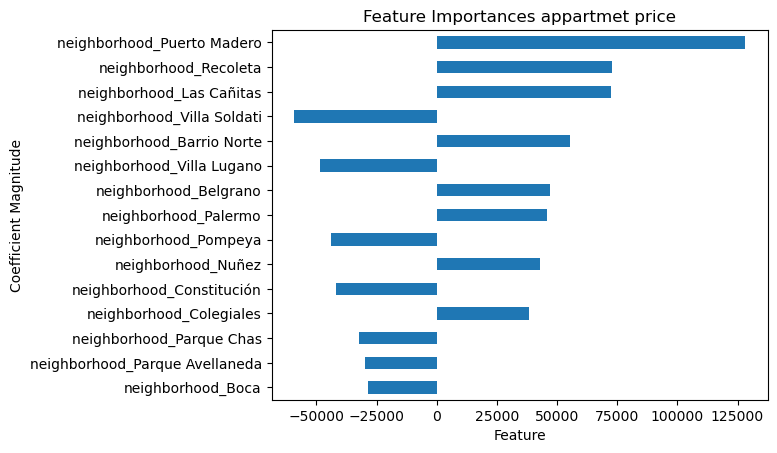

In [20]:
feat_imp.sort_values(key=abs).tail(15).plot(kind="barh")
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importances appartmet price")
plt.show()